<a href="https://colab.research.google.com/github/gayathrymw/MathematicsProject-2/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv("/content/gdrive/My Drive/input/earthquake.csv",sep=",")
print(data)

                 id        date         time    lat   long country      city  \
0      2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey    bingol   
1      2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   kocaeli   
2      1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey    manisa   
3      2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey     sivas   
4      2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   sakarya   
...             ...         ...          ...    ...    ...     ...       ...   
24002  2.020000e+13  2017.03.10  12:23:42 AM  37.50  38.48  turkey  adiyaman   
24003  2.020000e+13  2017.03.10  12:42:44 AM  40.47  35.84  turkey    amasya   
24004  2.020000e+13  2017.04.05  12:08:11 AM  38.63  27.57  turkey    manisa   
24005  2.020000e+13  2017.04.05  12:35:09 AM  38.65  27.55  turkey    manisa   
24006  2.020000e+13  2017.04.05  12:25:25 AM  38.63  27.58  turkey    manisa   

                      area   direction 

In [ ]:
data=data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB
None


In [ ]:
import pandas as pd
data=pd.read_csv("/content/gdrive/My Drive/input/earthquake.csv",sep=",")
data=data[['id','lat','long','dist','depth','xm','md','richter','ms','mb']]
data=data.head(10)
print(data)


             id    lat   long  dist  depth   xm   md  richter   ms   mb
0  2.000000e+13  39.04  40.38   0.1   10.0  4.1  4.1      0.0  0.0  0.0
1  2.010000e+13  40.79  30.09   0.1    5.2  4.0  3.8      4.0  0.0  0.0
2  1.980000e+13  38.58  27.61   0.1    0.0  3.7  0.0      0.0  0.0  3.7
3  2.000000e+13  39.47  36.44   0.1   10.0  3.5  3.5      0.0  0.0  0.0
4  2.000000e+13  40.80  30.24   0.1    7.0  4.3  4.3      0.0  0.0  0.0
5  2.010000e+13  37.11  27.75   0.1   32.8  3.5  3.5      0.0  0.0  0.0
6  2.010000e+13  38.75  43.61   0.1    9.4  4.5  0.0      4.5  0.0  0.0
7  1.990000e+13  39.43  27.98   0.1   26.0  3.8  3.8      0.0  0.0  0.0
8  2.000000e+13  40.05  34.07   0.1    1.0  3.8  3.8      0.0  0.0  0.0
9  2.010000e+13  38.76  43.54   0.1    3.1  4.3  0.0      4.2  0.0  4.3


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import os
print(os.listdir("/content/gdrive/My Drive/input"))


['earthquake.csv']


In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content/gdrive/My Drive/input"]).decode("utf8"))

earthquake.csv



In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri.corr()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
id,1.000000,-0.071851,0.104695,0.005693,-0.201035,-0.535262,-0.379838,-0.152355,-0.613444,-0.672286,-0.611488
lat,-0.071851,1.000000,0.232346,0.079336,-0.241904,-0.010347,0.051100,-0.032155,0.040614,0.056228,0.015019
long,0.104695,0.232346,1.000000,0.028332,-0.064886,0.071856,0.107302,-0.140393,0.103712,0.043574,0.003432
dist,0.005693,0.079336,0.028332,1.000000,0.028694,0.004511,-0.004314,0.006295,-0.011798,-0.009058,-0.000091
depth,-0.201035,-0.241904,-0.064886,0.028694,1.000000,0.302926,0.042542,0.150559,0.215900,0.260246,0.313953
xm,-0.535262,-0.010347,0.071856,0.004511,0.302926,1.000000,0.241432,0.426653,0.781860,0.699579,0.628382
md,-0.379838,0.051100,0.107302,-0.004314,0.042542,0.241432,1.000000,-0.237586,0.623224,0.461104,-0.022863
richter,-0.152355,-0.032155,-0.140393,0.006295,0.150559,0.426653,-0.237586,1.000000,0.447001,0.419664,0.240694
mw,-0.613444,0.040614,0.103712,-0.011798,0.215900,0.781860,0.623224,0.447001,1.000000,0.640529,0.628503
ms,-0.672286,0.056228,0.043574,-0.009058,0.260246,0.699579,0.461104,0.419664,0.640529,1.000000,0.588919


## MODEL 1

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['date','time','lat','city','long','depth','xm']]    #index 1: Kocaeli earthquake is our prediction 
data=veri.head(10)  
print(data)

         date         time    lat       city   long  depth   xm
0  2003.05.20  12:17:44 AM  39.04     bingol  40.38   10.0  4.1
1  2007.08.01  12:03:08 AM  40.79    kocaeli  30.09    5.2  4.0
2  1978.05.07  12:41:37 AM  38.58     manisa  27.61    0.0  3.7
3  1997.03.22  12:31:45 AM  39.47      sivas  36.44   10.0  3.5
4  2000.04.02  12:57:38 AM  40.80    sakarya  30.24    7.0  4.3
5  2005.01.21  12:04:03 AM  37.11      mugla  27.75   32.8  3.5
6  2012.06.24  12:07:22 AM  38.75        van  43.61    9.4  4.5
7  1987.12.31  12:49:54 AM  39.43  balikesir  27.98   26.0  3.8
8  2000.02.07  12:11:45 AM  40.05  kirikkale  34.07    1.0  3.8
9  2011.10.28  12:47:56 AM  38.76        van  43.54    3.1  4.3


In [ ]:
veri=veri[['lat','long','depth','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

     lat   long  depth   xm
0  39.04  40.38   10.0  4.1
1  40.79  30.09    5.2  4.0
2  38.58  27.61    0.0  3.7
3  39.47  36.44   10.0  3.5
4  40.80  30.24    7.0  4.3
5  37.11  27.75   32.8  3.5
6  38.75  43.61    9.4  4.5
7  39.43  27.98   26.0  3.8
8  40.05  34.07    1.0  3.8
9  38.76  43.54    3.1  4.3


In [ ]:
import numpy as np #use numpy for y variable for Linear Regression
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1)) #prepare attribute (X variable) and drop the predicted value

In [ ]:
from sklearn.model_selection import train_test_split  #lets split data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression  #lets set LR model

In [ ]:
linear=LinearRegression() #taking an example

In [ ]:
linear.fit(X_train,y_train) #training data

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.09562603089277644


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.10377022877473485


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.01261989 0.0073032  0.0080358 ]
intercepts: 
 3.2067500382814664


In [ ]:
predict_data=np.array([[40.05,35.80,10.0]])   #kocaeli earthquake prediction is 4.05, quiet close to the real value
data2=linear.predict(predict_data)
print(data2)  

[4.05398897]


In [ ]:
ans = linear.predict(X_test)
print(ans)

[3.92791843 4.0976734  3.96371783 ... 4.000412   3.99316906 4.05822956]


Text(0, 0.5, 'Predicted Magnitude')

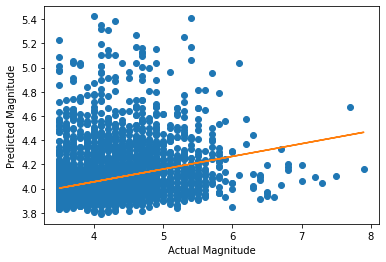

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

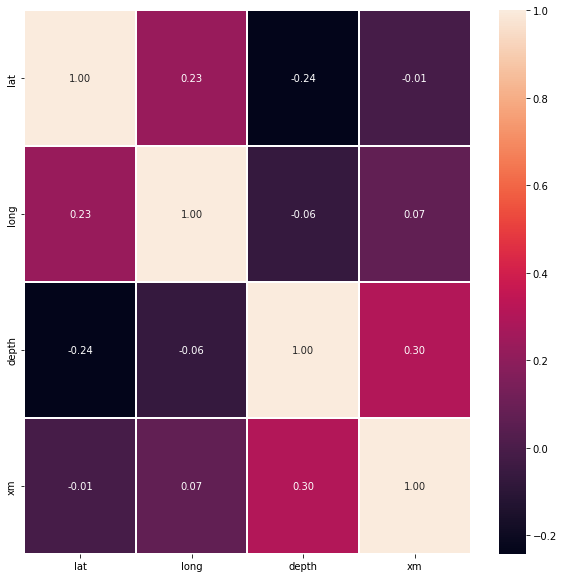

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

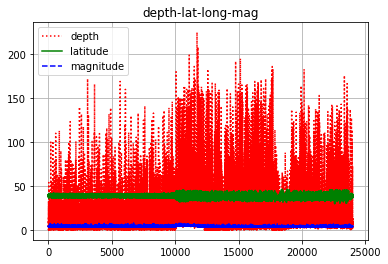

In [ ]:
veri.depth.plot(kind="line",grid=True,label="depth",linestyle=":",color="r")
veri.lat.plot(kind="line",grid=True,label="latitude",linestyle="-",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("depth-lat-long-mag")
plt.show()

## MODEL 2

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['lat','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

     lat   xm
0  39.04  4.1
1  40.79  4.0
2  38.58  3.7
3  39.47  3.5
4  40.80  4.3
5  37.11  3.5
6  38.75  4.5
7  39.43  3.8
8  40.05  3.8
9  38.76  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

-0.0002960485870284746


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.0001274797783654691


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [-0.00295254]
intercepts: 
 4.17005806032919


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.06524298 4.06857935 4.0667783  ... 4.0566511  4.05671015 4.05659205]


Text(0, 0.5, 'Predicted Magnitude')

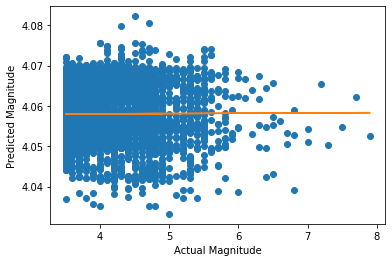

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

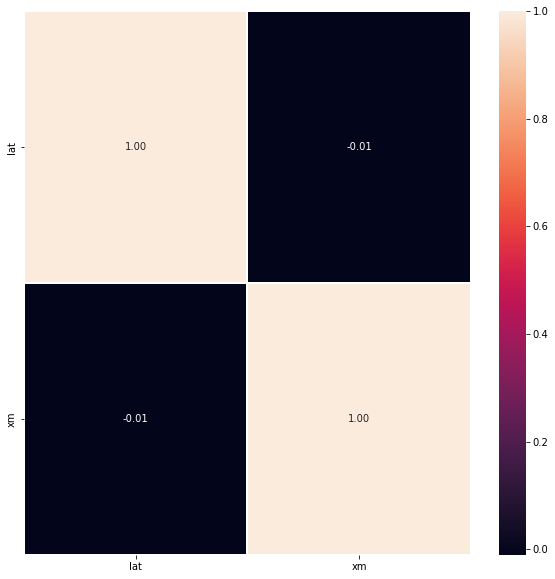

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

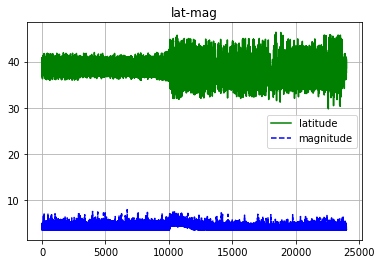

In [ ]:
veri.lat.plot(kind="line",grid=True,label="latitude",linestyle="-",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("lat-mag")
plt.show()

## MODEL 3

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['long','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

    long   xm
0  40.38  4.1
1  30.09  4.0
2  27.61  3.7
3  36.44  3.5
4  30.24  4.3
5  27.75  3.5
6  43.61  4.5
7  27.98  3.8
8  34.07  3.8
9  43.54  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.004425146375305


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.005265795270775864


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.00635528]
intercepts: 
 3.862596416971197


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.03037572 4.04365825 4.0574492  ... 4.1104522  4.0414339  4.11159615]


Text(0, 0.5, 'Predicted Magnitude')

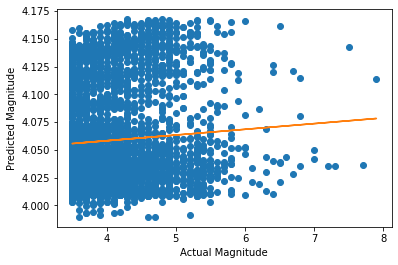

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

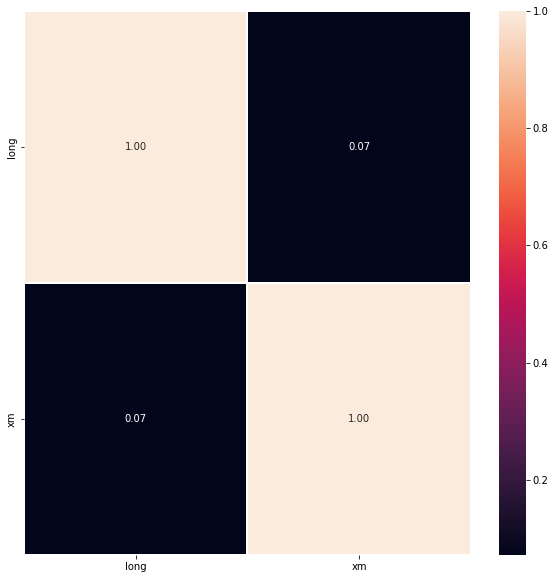

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

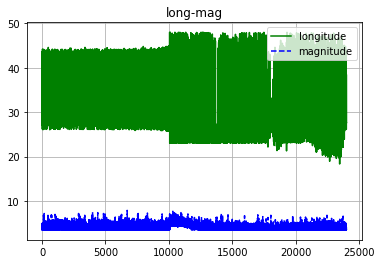

In [ ]:
veri.long.plot(kind="line",grid=True,label="longitude",linestyle="-",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("long-mag")
plt.show()

## MODEL 4

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['depth','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

   depth   xm
0   10.0  4.1
1    5.2  4.0
2    0.0  3.7
3   10.0  3.5
4    7.0  4.3
5   32.8  3.5
6    9.4  4.5
7   26.0  3.8
8    1.0  3.8
9    3.1  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.08661543906198765


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.09294024214315466


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.00760044]
intercepts: 
 3.9180391491564848


In [ ]:
ans = linear.predict(X_test)
print(ans)

[3.99404357 4.15365285 4.00468419 ... 3.94084047 4.00924445 3.99404357]


Text(0, 0.5, 'Predicted Magnitude')

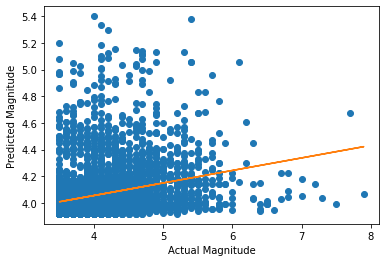

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

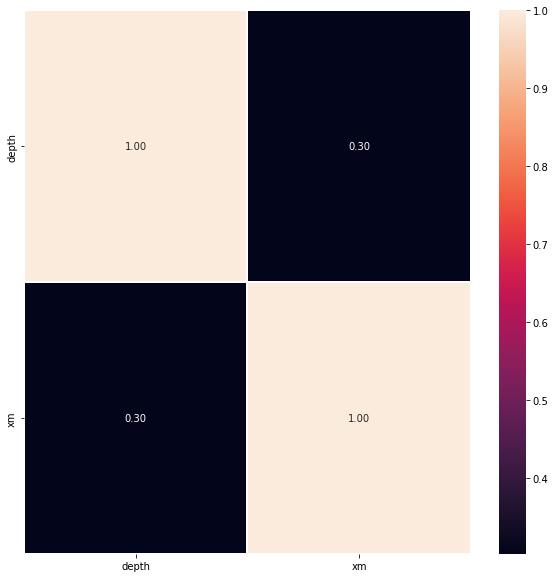

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

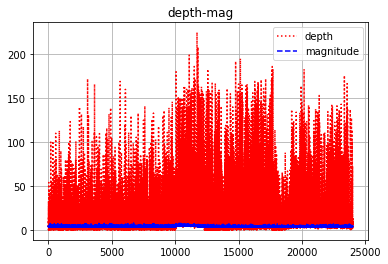

In [ ]:
veri.depth.plot(kind="line",grid=True,label="depth",linestyle=":",color="r")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("depth-mag")
plt.show()

## MODEL 5

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['md','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

    md   xm
0  4.1  4.1
1  3.8  4.0
2  0.0  3.7
3  3.5  3.5
4  4.3  4.3
5  3.5  3.5
6  0.0  4.5
7  3.8  3.8
8  3.8  3.8
9  0.0  4.3


In [ ]:
y=np.array(veri['xm'])
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.0508347686273769


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.060052510450098406


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.06826882]
intercepts: 
 3.9277777828804052


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.25546811 4.17354553 3.92777778 ... 4.17354553 4.18037241 4.17354553]


Text(0, 0.5, 'Predicted Magnitude')

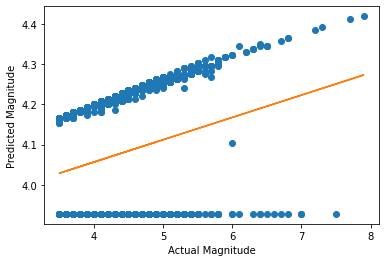

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

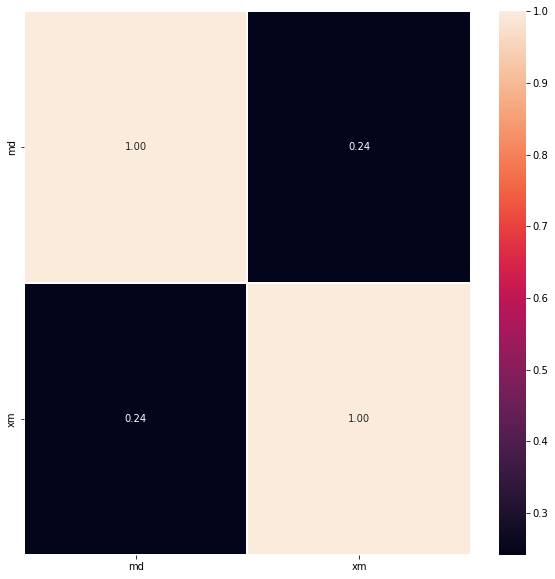

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

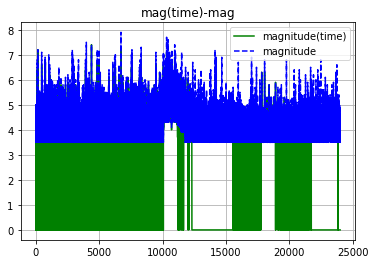

In [ ]:
veri.md.plot(kind="line",grid=True,label="magnitude(time)",linestyle="-",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("mag(time)-mag")
plt.show()

## MODEL 6

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['richter','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

   richter   xm
0      0.0  4.1
1      4.0  4.0
2      0.0  3.7
3      0.0  3.5
4      0.0  4.3
5      0.0  3.5
6      4.5  4.5
7      0.0  3.8
8      0.0  3.8
9      4.2  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.17802813365112058


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.18296586969768325


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.11795945]
intercepts: 
 3.7986765609837883


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.3648819  3.79867656 4.35308595 ... 3.79867656 3.79867656 3.79867656]


Text(0, 0.5, 'Predicted Magnitude')

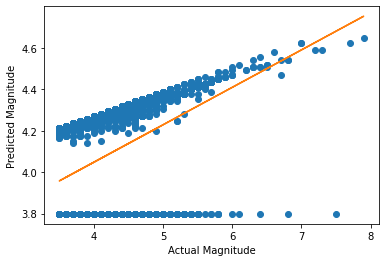

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

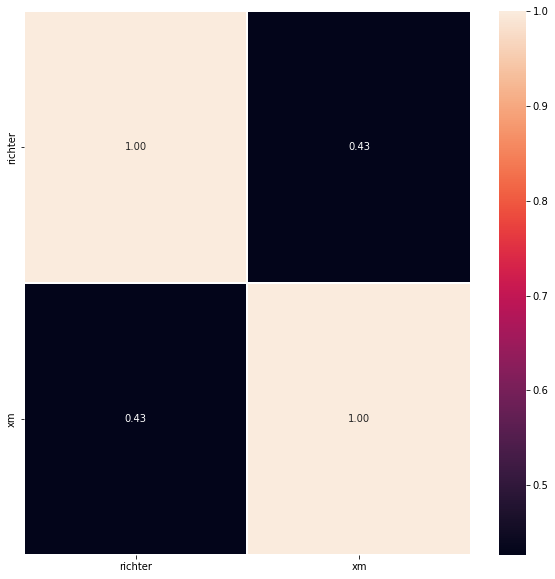

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

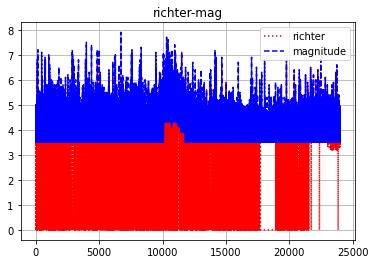

In [ ]:
veri.richter.plot(kind="line",grid=True,label="richter",linestyle=":",color="r")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("richter-mag")
plt.show()

## MODEL 7

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['mb','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

    mb   xm
0  0.0  4.1
1  0.0  4.0
2  3.7  3.7
3  0.0  3.5
4  0.0  4.3
5  0.0  3.5
6  0.0  4.5
7  0.0  3.8
8  0.0  3.8
9  4.3  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.4142462265111352


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.38997149219131944


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.16692572]
intercepts: 
 3.77360782071784


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.59154385 3.77360782 4.45800327 ... 3.77360782 3.77360782 3.77360782]


Text(0, 0.5, 'Predicted Magnitude')

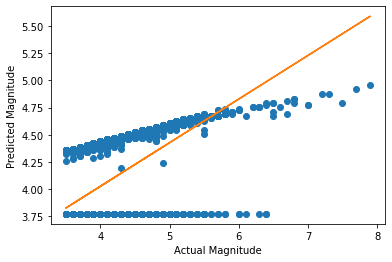

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

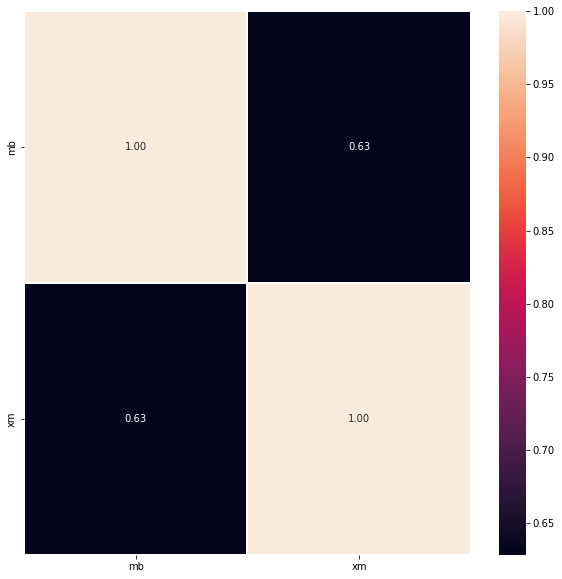

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

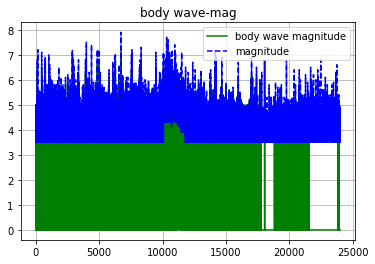

In [ ]:
veri.mb.plot(kind="line",grid=True,label="body wave magnitude",linestyle="-",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("body wave-mag")
plt.show()

## MODEL 8

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['md','richter','mb','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

    md  richter   mb   xm
0  4.1      0.0  0.0  4.1
1  3.8      4.0  0.0  4.0
2  0.0      0.0  3.7  3.7
3  3.5      0.0  0.0  3.5
4  4.3      0.0  0.0  4.3
5  3.5      0.0  0.0  3.5
6  0.0      4.5  0.0  4.5
7  3.8      0.0  0.0  3.8
8  3.8      0.0  0.0  3.8
9  0.0      4.2  4.3  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.5922785397865215


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.5850584040922908


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.09611856 0.10452343 0.14484328]
intercepts: 
 3.397928902765588


In [ ]:
ans = linear.predict(X_test)
print(ans)

[5.07074252 3.7439557  4.48304648 ... 3.7439557  3.75356756 3.7439557 ]


Text(0, 0.5, 'Predicted Magnitude')

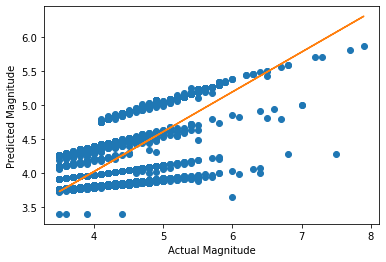

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

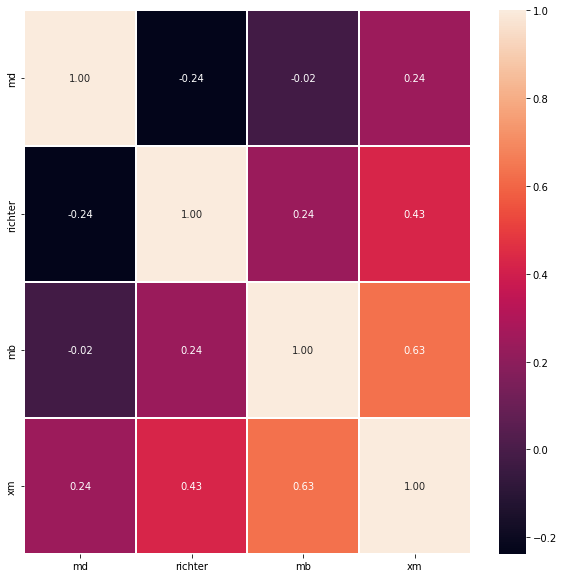

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

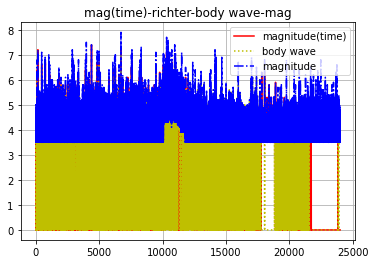

In [ ]:
veri.md.plot(kind="line",grid=True,label="magnitude(time)",linestyle="-",color="r")
veri.mb.plot(kind="line",grid=True,label="body wave",linestyle=":",color="y")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="-.",color="b")
plt.legend(loc="best")  
plt.title("mag(time)-richter-body wave-mag")
plt.show()

## MODEL 9

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['lat','long','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

     lat   long   xm
0  39.04  40.38  4.1
1  40.79  30.09  4.0
2  38.58  27.61  3.7
3  39.47  36.44  3.5
4  40.80  30.24  4.3
5  37.11  27.75  3.5
6  38.75  43.61  4.5
7  39.43  27.98  3.8
8  40.05  34.07  3.8
9  38.76  43.54  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.004976502022519758


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.006093037938189383


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [-0.0077287   0.00695094]
intercepts: 
 4.137397140405978


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.04653297 4.06979386 4.08016288 ... 4.11162424 4.03629165 4.11272083]


Text(0, 0.5, 'Predicted Magnitude')

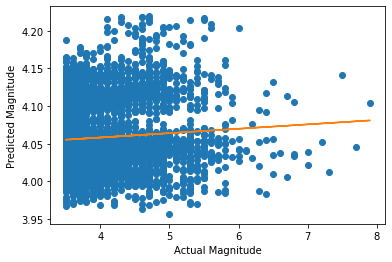

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

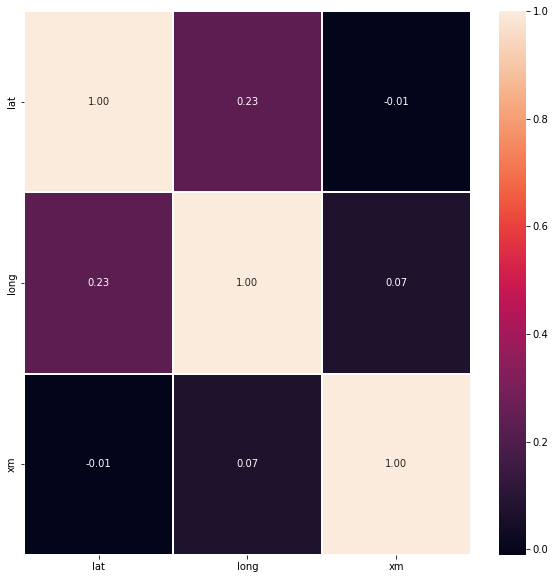

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

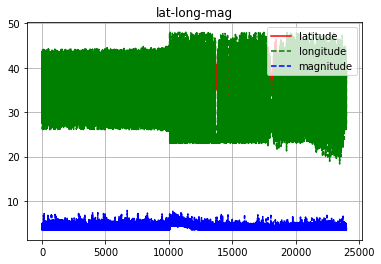

In [ ]:
veri.lat.plot(kind="line",grid=True,label="latitude",linestyle="-",color="r")
veri.long.plot(kind="line",grid=True,label="longitude",linestyle="--",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("lat-long-mag")
plt.show()

## MODEL 10

In [ ]:
veri=pd.read_csv(('/content/gdrive/My Drive/input/earthquake.csv'), encoding='utf-8', engine='python',sep=',',error_bad_lines=False)
veri.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
veri=veri[['md','mb','xm']]    #index 1 is our prediction earthquake
data=veri.head(10)  
print(data)

    md   mb   xm
0  4.1  0.0  4.1
1  3.8  0.0  4.0
2  0.0  3.7  3.7
3  3.5  0.0  3.5
4  4.3  0.0  4.3
5  3.5  0.0  3.5
6  0.0  0.0  4.5
7  3.8  0.0  3.8
8  3.8  0.0  3.8
9  0.0  4.3  4.3


In [ ]:
y=np.array(veri['xm'])

In [ ]:
X=np.array(veri.drop('xm',axis=1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
data=linear.score(X_test,y_test)  # score of test datas
print(data)

0.47361351773114924


In [ ]:
data=linear.score(X_train,y_train) #score of training datas
print(data)

0.45695064970434807


In [ ]:
print('coefficients: \n',linear.coef_) 
print('intercepts: \n',linear.intercept_)

coefficients: 
 [0.07211589 0.16844211]
intercepts: 
 3.6333801034053885


In [ ]:
ans = linear.predict(X_test)
print(ans)

[4.80490269 3.8929973  4.32399274 ... 3.8929973  3.90020889 3.8929973 ]


Text(0, 0.5, 'Predicted Magnitude')

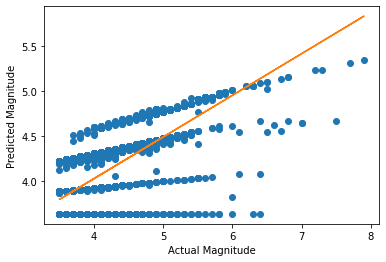

In [ ]:
plt.plot(y_test, ans, 'o')
m, b = np.polyfit(y_test,ans, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

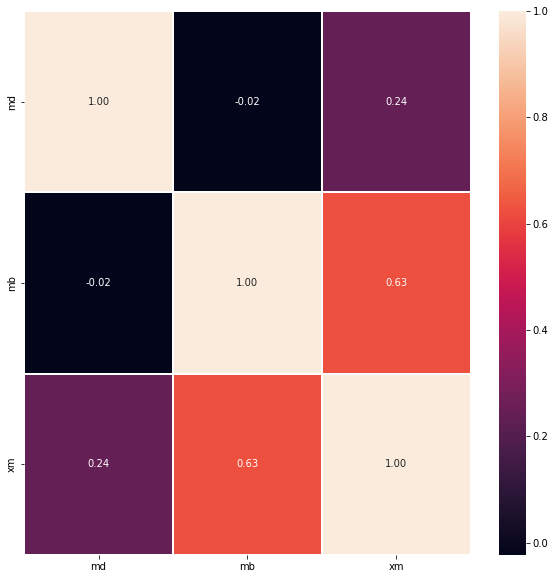

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sn.heatmap(veri.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

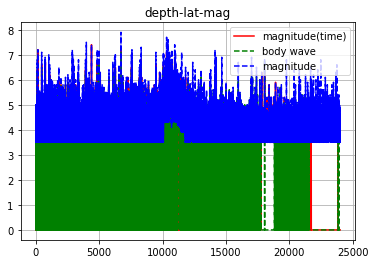

In [ ]:
veri.md.plot(kind="line",grid=True,label="magnitude(time)",linestyle="-",color="r")
veri.mb.plot(kind="line",grid=True,label="body wave",linestyle="--",color="g")
veri.xm.plot(kind="line",grid=True,label="magnitude",linestyle="--",color="b")
plt.legend(loc="best")  
plt.title("depth-lat-mag")
plt.show()